In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
hm = pd.read_csv('Sports_H_and_M.csv')

In [3]:
pd.set_option('display.max_rows', None)

In [4]:
hm.rename(mapper = {'price_of_product(in dollar)':'price_in_dollar'}, axis = 1, inplace = True)

In [5]:
hm.rename(mapper = {'swatches_Total':'swatches_total'}, axis = 1, inplace = True)

In [6]:
hm.rename(mapper = {'Name_of_product':'product_name'}, axis = 1, inplace = True)

In [7]:
hm.drop(['product_link', 'swatches_color_code', 'brand_name'], axis = 1, inplace = True)

In [8]:
hm.head(2)

,product_name,category,price_in_dollar,swatches_total,swatches_color
0,Sports Shorts,sportswear_men_clothing_shorts,12.99,3,Black
1,DryMove Sports Joggers,sportswear_men_clothing_trousersjoggers,39.99,6,Dark gray melange


In [11]:
hm.shape

(9146, 5)

In [12]:
hm.isna().any()

product_name       False
category           False
price_in_dollar    False
swatches_total     False
swatches_color     False
dtype: bool

In [13]:
hm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_name     9146 non-null   object 
 1   category         9146 non-null   object 
 2   price_in_dollar  9146 non-null   float64
 3   swatches_total   9146 non-null   int64  
 4   swatches_color   9146 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 357.4+ KB


In [14]:
hm.describe()

,price_in_dollar,swatches_total
count,9146.000000,9146.000000
mean,43.931765,4.558824
std,29.229448,2.788692
min,12.990000,1.000000
25%,19.990000,3.000000
50%,37.490000,4.000000
75%,64.990000,6.000000
max,149.000000,10.000000


In [15]:
hm['price_in_dollar'].sum()

401799.92000000004

In [168]:
hm['category'].value_counts()

men_jacketscoats_jackets                      2152
sportswear_men_clothing_trousersjoggers       1883
men_sport_tops                                1345
men_tshirtstanks_shortsleeve                  1345
sportswear_men_clothing_shorts                 538
sportswear_men_clothing_tops_tshirts           538
men_trousers                                   269
men_sport_bottoms_trousers                     269
sportswear_men_clothing_hoodiessweatshirts     269
ladies_accessories                             269
men_tshirtstanks_longsleeve                    269
Name: category, dtype: int64

In [169]:
product_per_category_count = hm['category'].value_counts()

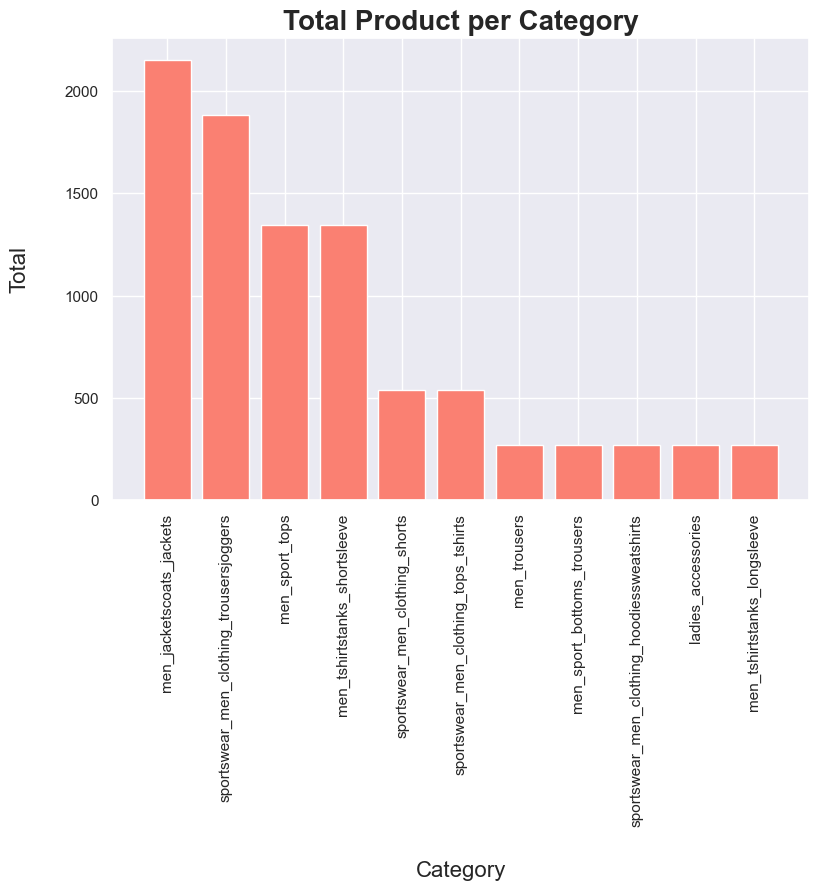

In [202]:
plt.figure(figsize = (9, 6))
plt.bar(x = product_per_category_count.index,
       height = product_per_category_count,
       color = 'salmon')
plt.xticks(rotation = 90)
plt.title('Total Product per Category', fontsize = 20, fontweight = 'bold')
plt.xlabel('Category', fontsize = 16, labelpad = 25)
plt.ylabel('Total', fontsize = 16, labelpad = 25)
plt.show()

In [171]:
hm['product_name'].value_counts()

DryMove Sports Shirt                      1614
DryMove Sports Joggers                    1345
DryMove Sports Hoodie                      807
Sports Windbreaker                         807
Sports Shorts                              538
Regular Fit Lightweight Outdoor Jacket     538
Track Jacket                               269
Running Shirt in DryMove                   269
DryMove Running Shirt                      269
Fast-drying Sports Shirt                   269
DryMove Reversible Track Jacket            269
Padded Leg Gaiters                         269
Padded Shell Pants                         269
Puffer Pants with Belt                     269
Track Pants                                269
StormMove 2.5-layer Parka                  269
Running Pants                              269
Regular Fit Padded Vest                    269
Regular Fit Fast-drying Track Jacket       269
Name: product_name, dtype: int64

In [172]:
product_count = hm['product_name'].value_counts()

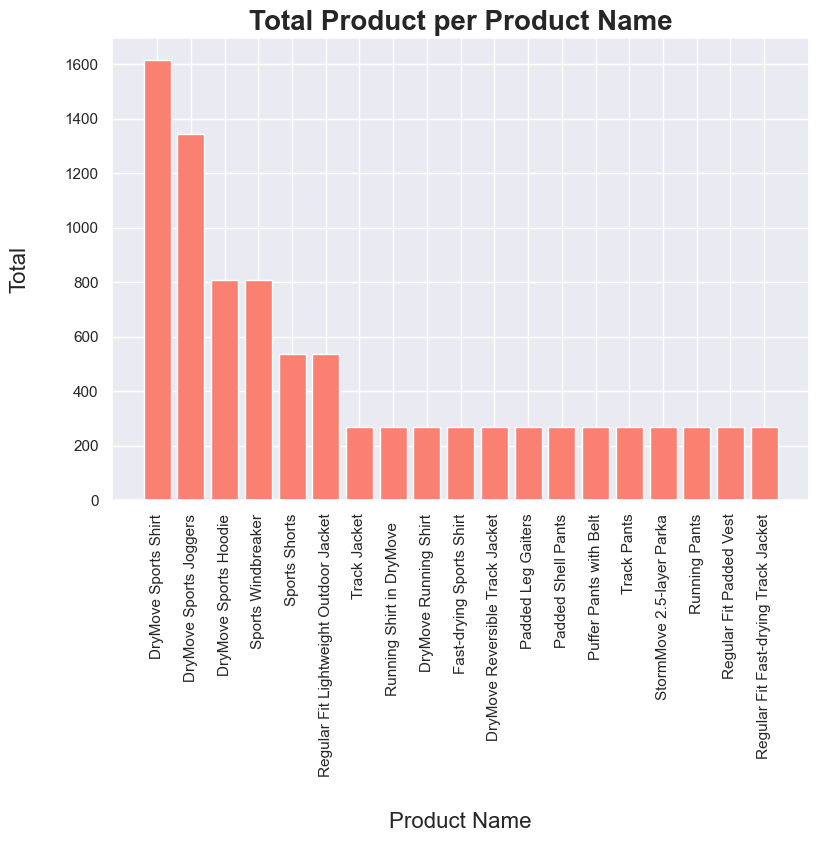

In [201]:
plt.figure(figsize = (9, 6))
plt.bar(x = product_count.index,
       height = product_count,
       color = 'salmon')
plt.xticks(rotation = 90)
plt.title('Total Product per Product Name', fontsize = 20, fontweight = 'bold')
plt.xlabel('Product Name', fontsize = 16, labelpad = 25)
plt.ylabel('Total', fontsize = 16, labelpad = 25)
plt.show()

In [174]:
hm.groupby('category')['price_in_dollar'].sum().sort_values(ascending = False)

category
men_jacketscoats_jackets                      135557.17
men_sport_tops                                 85800.24
sportswear_men_clothing_trousersjoggers        71266.17
men_sport_bottoms_trousers                     22862.31
men_trousers                                   20172.31
men_tshirtstanks_shortsleeve                   18816.55
sportswear_men_clothing_hoodiessweatshirts     13447.31
sportswear_men_clothing_tops_tshirts           10754.62
ladies_accessories                              9412.31
sportswear_men_clothing_shorts                  6988.62
men_tshirtstanks_longsleeve                     6722.31
Name: price_in_dollar, dtype: float64

In [175]:
total_price_per_category = hm.groupby('category')['price_in_dollar'].sum().sort_values(ascending = False)

In [176]:
# categories = hm.groupby('category')
# categories['price_in_dollar'].sum().sort_values(ascending = False).plot(kind = 'bar')

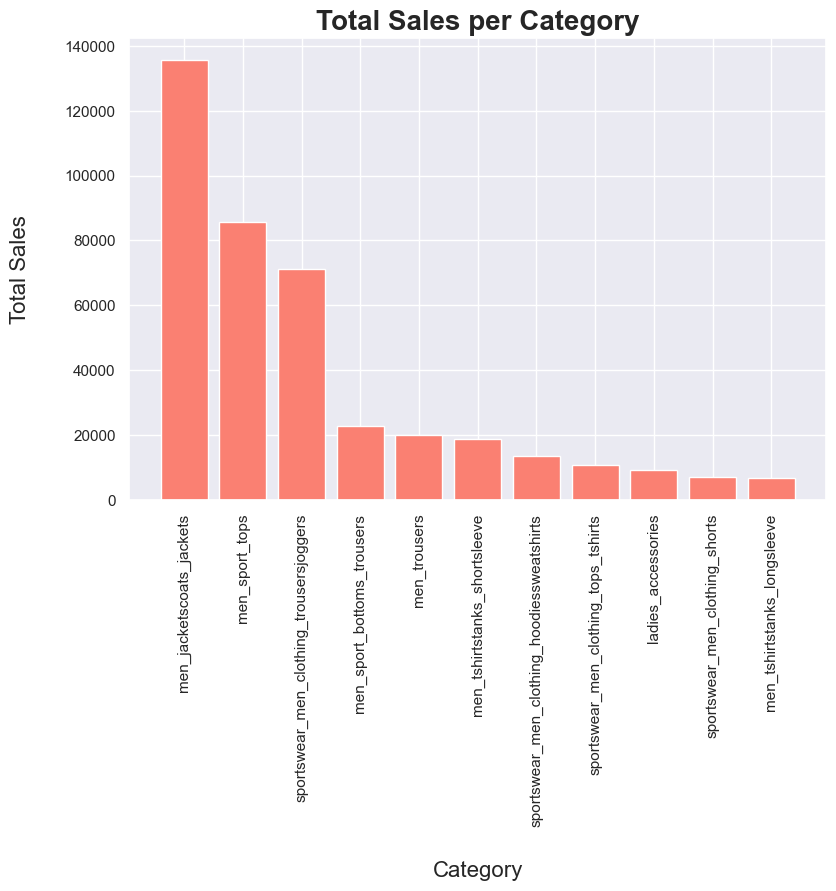

In [200]:
plt.figure(figsize = (9, 6))
plt.bar(x = total_price_per_category.index,
       height = total_price_per_category,
       color = 'salmon')
plt.xticks(rotation = 90)
plt.title('Total Sales per Category', fontsize = 20, fontweight = 'bold')
plt.xlabel('Category', fontsize = 16, labelpad = 25)
plt.ylabel('Total Sales', fontsize = 16, labelpad = 25)
plt.show()

In [179]:
hm.groupby('product_name')['price_in_dollar'].sum().sort_values(ascending = False)

product_name
DryMove Sports Joggers                    53786.55
DryMove Sports Hoodie                     52446.93
Regular Fit Lightweight Outdoor Jacket    40344.62
StormMove 2.5-layer Parka                 40081.00
Sports Windbreaker                        28236.93
DryMove Reversible Track Jacket           26631.00
DryMove Sports Shirt                      24731.86
Puffer Pants with Belt                    22862.31
Padded Shell Pants                        20172.31
Regular Fit Padded Vest                   13447.31
Track Jacket                              13447.31
Regular Fit Fast-drying Track Jacket      13447.31
Running Pants                              9412.31
Padded Leg Gaiters                         9412.31
Track Pants                                8067.31
Sports Shorts                              6988.62
Running Shirt in DryMove                   6722.31
Fast-drying Sports Shirt                   6722.31
DryMove Running Shirt                      4839.31
Name: price_in_dol

In [180]:
total_price_per_product = hm.groupby('product_name')['price_in_dollar'].sum().sort_values(ascending = False)

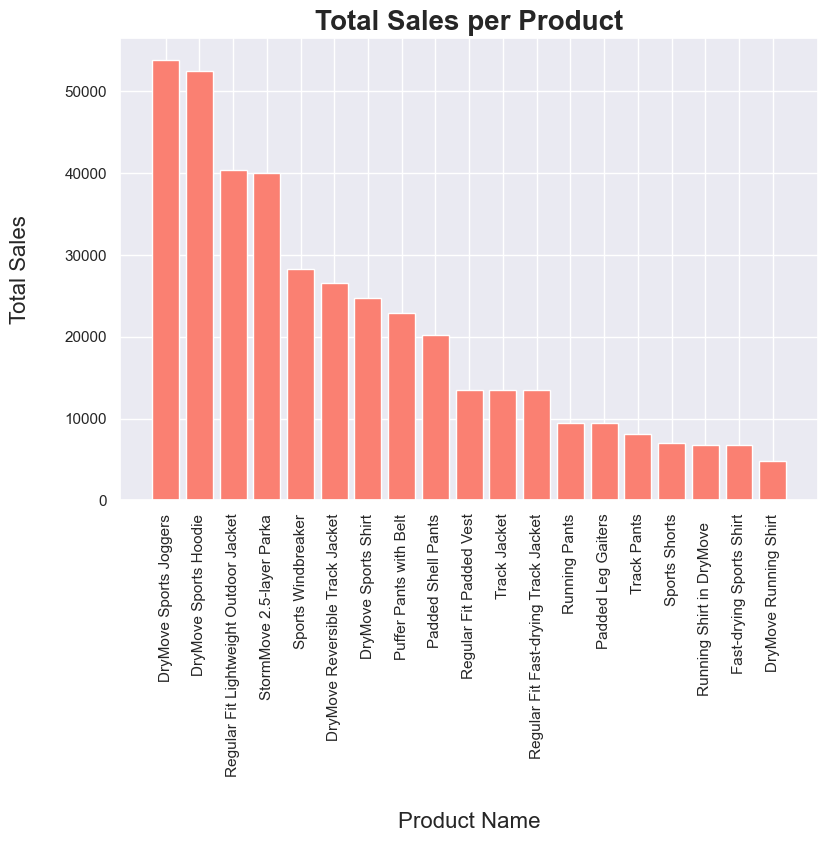

In [199]:
plt.figure(figsize = (9, 6))
plt.bar(x = total_price_per_product.index,
       height = total_price_per_product,
       color = 'salmon')
plt.xticks(rotation = 90)
plt.title('Total Sales per Product', fontsize = 20, fontweight = 'bold')
plt.xlabel('Product Name', fontsize = 16, labelpad = 25)
plt.ylabel('Total Sales', fontsize = 16, labelpad = 25)
plt.show()

In [182]:
hm.groupby('swatches_color')['swatches_total'].sum().sort_values(ascending = False)

swatches_color
Black                       13719
Navy blue                    4304
White                        3228
Black melange                2690
Dark blue melange            2690
Dark khaki green melange     2690
Light gray melange           2421
Dark green                   1614
Dark gray melange            1614
White/black                  1614
Dark red                     1345
Dark blue                    1345
Dark gray                     807
Gray melange                  807
Dark khaki green              269
Brown                         269
Black/patterned               269
Name: swatches_total, dtype: int64

In [183]:
sum_by_color = hm.groupby('swatches_color')['swatches_total'].sum().sort_values(ascending = False)
sum_by_color.head(4)

swatches_color
Black            13719
Navy blue         4304
White             3228
Black melange     2690
Name: swatches_total, dtype: int64

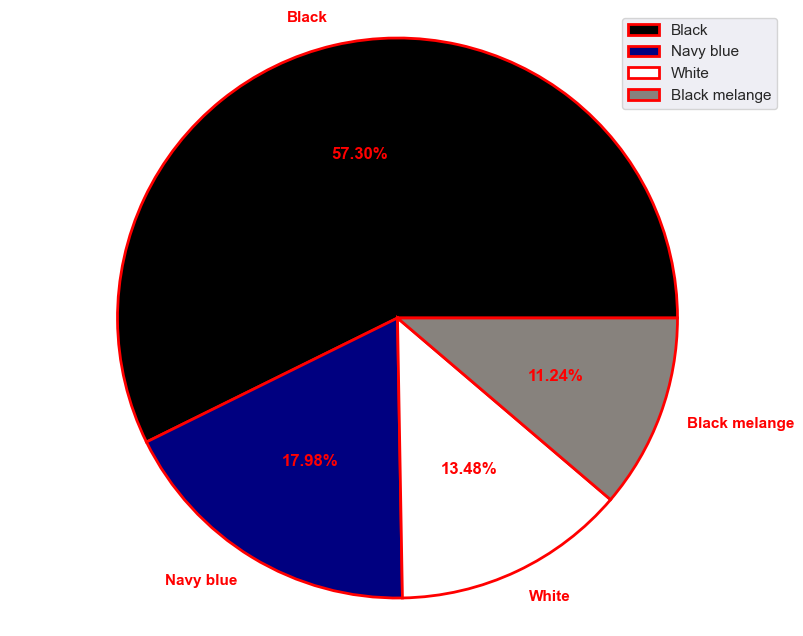

In [184]:
plt.figure(figsize = (10, 8))
plt.pie(sum_by_color.head(4),
       labels = sum_by_color.head(4).index,
       autopct = '%.2f%%',
       textprops = {'fontweight' : 'bold',
                   'color' : 'red'},
       colors = ['#000000', '#000080', '#ffffff', '#87827d'],
       wedgeprops = {'edgecolor':'red',
                    'linewidth':2,
                    'antialiased':True})
plt.legend()
plt.axis('equal')
plt.show()

In [186]:
sales_by_color = hm.groupby('swatches_color')['price_in_dollar'].sum().sort_values(ascending = False)
sales_by_color

swatches_color
Black                       139576.03
Navy blue                    56479.24
Brown                        40081.00
Light gray melange           28239.62
Black/patterned              26631.00
Dark khaki green             20172.31
Gray melange                 13447.31
White                        12099.62
Dark green                   10757.31
Dark gray melange            10757.31
White/black                  10757.31
Dark red                      9412.31
Dark blue                     9412.31
Black melange                 3494.31
Dark khaki green melange      3494.31
Dark gray                     3494.31
Dark blue melange             3494.31
Name: price_in_dollar, dtype: float64

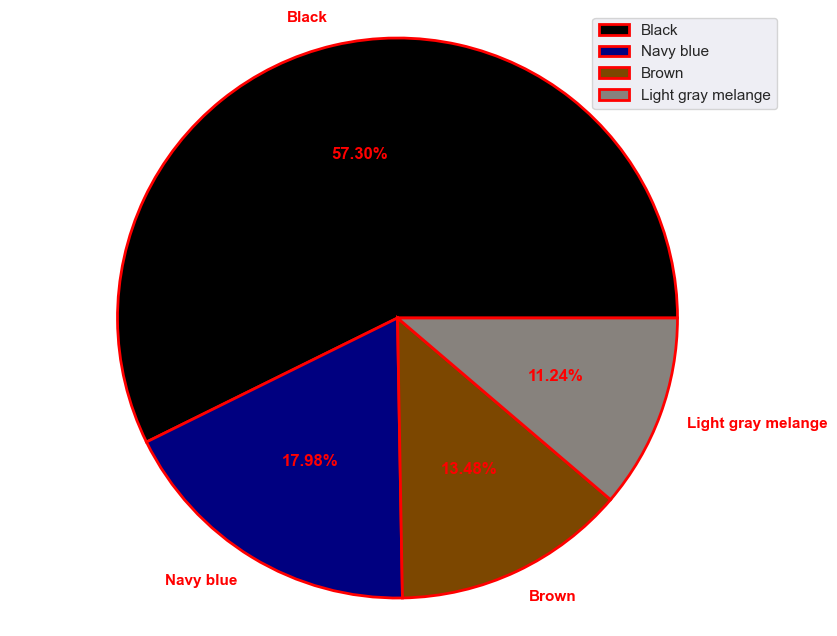

In [187]:
plt.figure(figsize = (10, 8))
plt.pie(sum_by_color.head(4),
       labels = sales_by_color.head(4).index,
       autopct = '%.2f%%',
       textprops = {'fontweight' : 'bold',
                   'color' : 'red'},
       colors = ['#000000', '#000080', '#7c4700', '#87827d'],
       wedgeprops = {'edgecolor':'red',
                    'linewidth':2,
                    'antialiased':True})
plt.legend()
plt.axis('equal')
plt.show()

In [188]:
total_product_per_color = hm.groupby(['product_name', 'swatches_color'])['swatches_total'].sum()
df = total_product_per_color.reset_index()

In [189]:
df = total_product_per_color.reset_index()
df = df.sort_values('swatches_total', ascending = False)

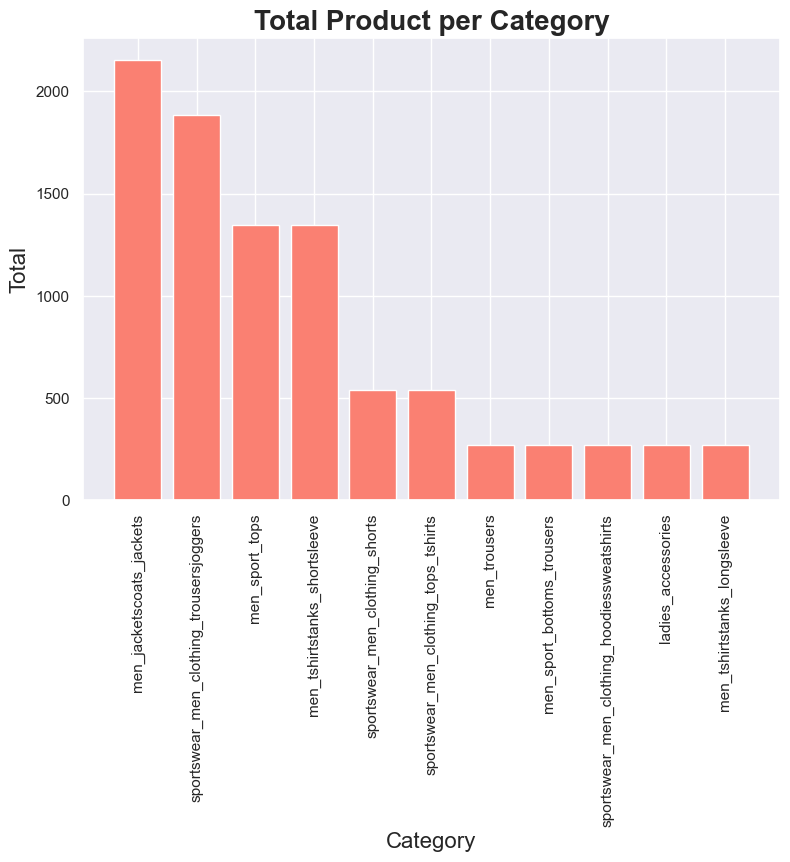

In [190]:
plt.figure(figsize = (9, 6))
plt.bar(x = product_per_category_count.index,
       height = product_per_category_count,
       color = 'salmon')
plt.xticks(rotation = 90)
plt.title('Total Product per Category', fontsize = 20, fontweight = 'bold')
plt.xlabel('Category', fontsize = 16, labelpad = 25)
plt.ylabel('Total', fontsize = 16, labelpad = 25)
plt.show()

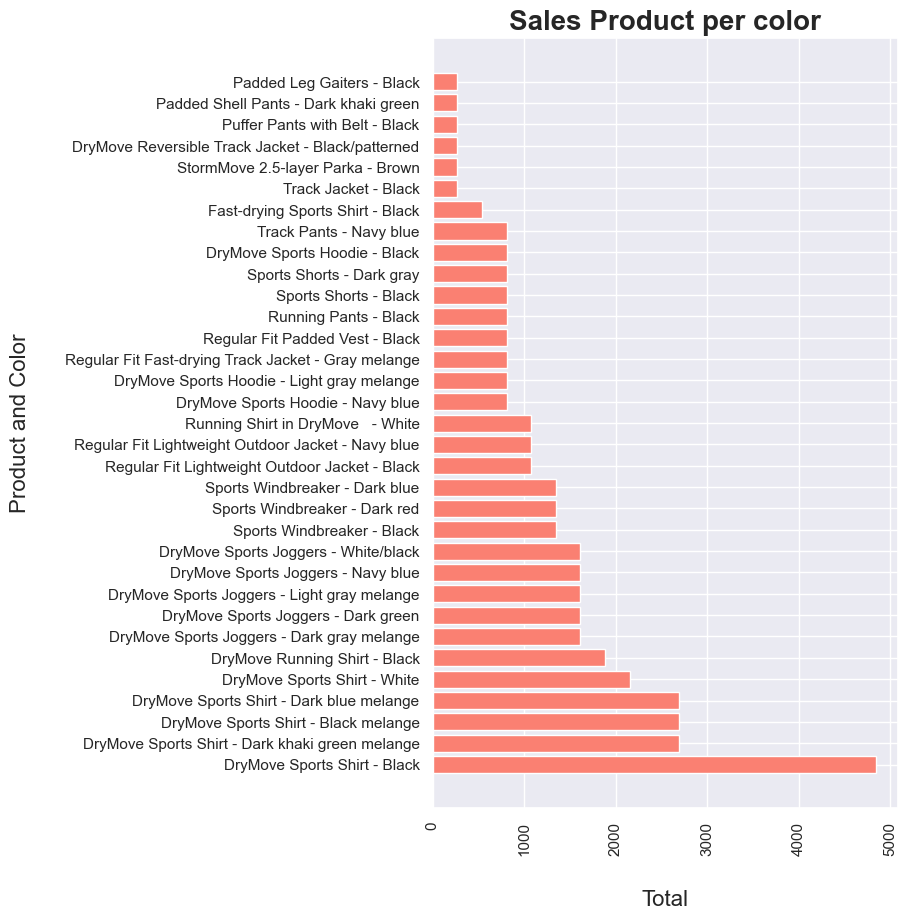

In [198]:
plt.figure(figsize=(6, 10))
plt.barh(y = df['product_name'] + ' - ' + df['swatches_color'],
       width = df['swatches_total'],
        color = 'salmon')
plt.xticks(rotation=90)
plt.title('Sales Product per color', fontsize = 20, fontweight = 'bold')
plt.xlabel('Total', fontsize = 16, labelpad = 25)
plt.ylabel('Product and Color', fontsize = 16, labelpad = 25)
plt.show()

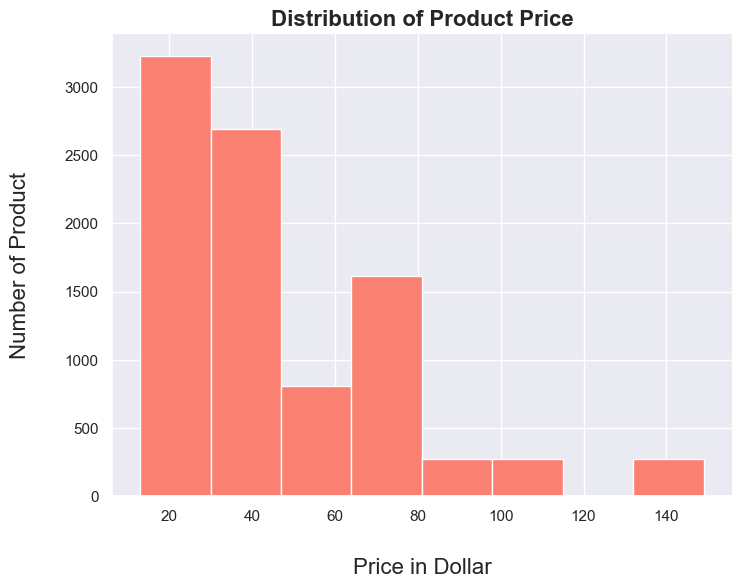

In [195]:
plt.figure(figsize = (8, 6))
plt.hist(hm['price_in_dollar'],
        bins = 8,
        color = 'salmon')
plt.title('Distribution of Product Price', fontsize = 16, weight = 'bold')
plt.xlabel('Price in Dollar', fontsize = 16, labelpad = 25)
plt.ylabel('Number of Product', fontsize = 16, labelpad = 25)
sns.despine()

plt.show()